In [5]:
# !pip install datascience

  Stored in directory: C:\Users\Nouman Ahmad\AppData\Local\pip\Cache\wheels\3d\1e\6b\02c0963570fce5e82f2d3903486e27999e9c47c926fd132fd3
  Stored in directory: C:\Users\Nouman Ahmad\AppData\Local\pip\Cache\wheels\9b\04\dd\7daf4150b6d9b12949298737de9431a324d4b797ffd63f526e
Successfully built datascience docopt


In [1]:
# Don't change this cell; just run it. 
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# (40 Points) Hotel Inspections

In this exercise, we will explore a dataset that includes the safety inspection scores for hotels. We will be interested in determining the average hotel score for the city from a random sample of the scores. The average hotel score is out of 100. We'll compare two methods for computing a confidence interval: the bootstrap resampling method, and an approximation based on the Central Limit Theorem.

In [2]:
hotel_scores = Table.read_table('hotel_inspection.csv')
hotel_scores

Inspection Date,Score
01/27/2014,100
08/18/2016,85
12/18/2014,72
01/22/2015,95
02/19/2015,100
11/14/2013,85
11/06/2014,100
01/25/2016,89
04/05/2016,76
11/10/2015,75


## 1. (10 Points) Data Exploration

**a. (3 Points) Plot a histogram of the scores in the cell below.**

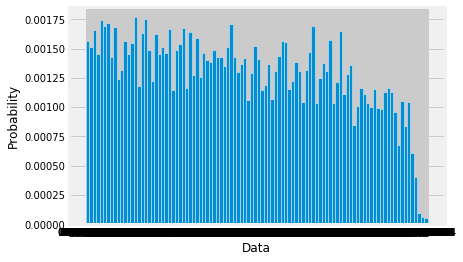

In [3]:
# Write your code here.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# np.random.seed(42)
x = hotel_scores['Inspection Date']
plt.hist(x, density=True, bins=100)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

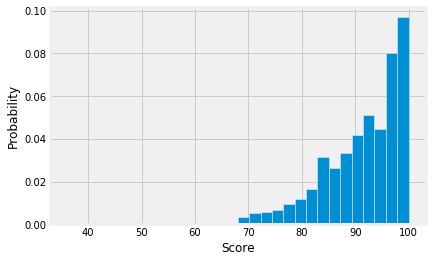

In [4]:
# Write your code here.
...
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# np.random.seed(42)
x = hotel_scores['Score']
plt.hist(x, density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Score');

# **b. (3 Points) Calculate the *population mean*:**

In [5]:
import pandas as pd
df=pd.read_csv('hotel_inspection.csv')

In [6]:
pop_mean=df.mean(skipna=True)

In [7]:
pop_mean

Score    91.42175
dtype: float64

Often it is impossible to find complete datasets like this.  Imagine we instead had access only to a random sample of 100 hotel inspections, called `hotel_sample`.  That table is created below. We are interested in using this sample to estimate the population mean.

In [8]:
hotel_sample = df.sample(100,random_state=1)
hotel_sample.head()

,Inspection Date,Score
11456,11/21/2014,100
16528,01/05/2015,100
3253,08/17/2015,94
18614,08/22/2016,94
1544,09/18/2015,100


**c. (4 Points) Plot a histogram of the *sample* scores in the cell below.**

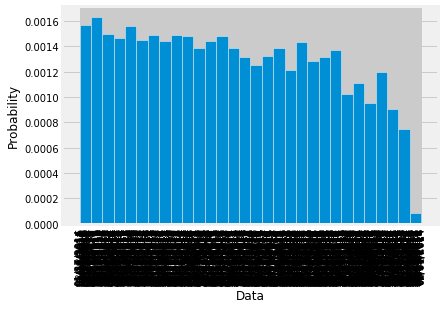

In [9]:
# Write your code here:
x = hotel_scores['Inspection Date']
plt.hist(x, density=True, bins=30)  # `density=False` would make counts
plt.xticks(rotation='vertical')
plt.ylabel('Probability')
plt.xlabel('Data');

Calculate the **sample mean**:

In [10]:
sample_mean = df.mean()

In [11]:
sample_mean

Score    91.42175
dtype: float64

# 2. (15 Points) Bootstraping
**a. (10 Points) Complete the function `bootstrap_scores` below. It should take no arguments. It should simulate drawing 5000  bootstrap samples (same size as the original sample) from `hotel_sample` and computing the mean hotel score in each sample.  It should return an array (resampled_means) of those 5000 bootstrap sample means.**

In [12]:
pop =hotel_sample['Score']
pop

11456    100
16528    100
3253      94
18614     94
1544     100
12568    100
15497     87
13987     94
9598     100
6668      92
4244      97
17420     90
5781      84
4570      96
15716     93
2401      88
6295      56
16204     97
10057     90
415       97
5642      85
8266      81
8645      97
7331      95
8214      94
10786     85
3729      84
6793      76
4895      94
3169      89
        ... 
2782      95
1104      89
12143     72
12031     95
13667     97
8561      96
4385      91
2784      84
9119      97
3198      82
5674     100
2055      98
8018      96
4        100
7661      96
1332      96
7803      93
17122     94
11939     93
8222      84
14626     61
72        88
15675     97
7076      89
1463      85
2277     100
8069      84
11148     93
14480     87
3894      94
Name: Score, Length: 100, dtype: int64

In [13]:
sample = np.random.choice(pop, size=300) #so n=300
sample

array([ 85,  97, 100,  85,  87,  91,  94,  76,  99,  84,  95,  87,  84,
        82,  95,  76, 100,  85,  90,  94,  97,  61, 100,  97,  97,  94,
        71,  93,  97,  76,  95,  97,  79,  89, 100,  93,  76, 100,  90,
        93,  86,  72,  86,  93,  94,  94,  91, 100,  84, 100,  93,  94,
        95,  97,  93,  90,  84,  93,  90,  91,  98,  90,  97,  96,  93,
        89,  87,  97,  94,  93,  93,  93,  75,  87,  87,  79, 100,  95,
        98,  88,  84, 100,  82,  94,  94,  88,  86,  97,  90,  94,  93,
        93,  81,  97, 100,  97,  88,  97,  97,  96,  94,  94,  89,  95,
        97,  91, 100,  94,  85,  94,  96,  81,  96,  96,  84, 100,  93,
        88,  97,  95,  95,  97, 100,  97,  93,  94,  97, 100,  80,  84,
        96, 100,  96,  84,  96,  93,  89,  56,  97, 100,  84,  96,  61,
       100,  88, 100,  96,  93,  91,  80,  94, 100,  93,  90,  90, 100,
        84, 100,  97,  82,  94,  98,  97, 100,  89,  89,  97, 100,  97,
        85,  96,  97, 100,  98,  72,  80,  97,  97,  94,  94,  9

In [14]:
resampled_means =[]   #sample_mean = []
def bootstrap_scores():
    for i in range(5000):
        resampled_mean = np.random.choice(sample, size=300)
        resampled_means.append(resampled_mean.mean())
    return resampled_means

In [15]:
resampled_means=bootstrap_scores()

(array([   3.,    9.,   81.,  435., 1085., 1558., 1232.,  492.,   95.,
          10.]),
 array([88.77666667, 89.16366667, 89.55066667, 89.93766667, 90.32466667,
        90.71166667, 91.09866667, 91.48566667, 91.87266667, 92.25966667,
        92.64666667]),
 <a list of 10 Patch objects>)

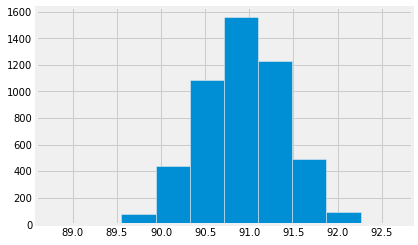

In [16]:
plt.hist(resampled_means)

Plot a histogram of the **bootstrap sample means**.

**b. (5 Points) Compute a 95 percent confidence interval for the average hotel score using the array `resampled_means`.**

In [17]:
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower_bound = max(0.0, np.percentile(resampled_means, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper_bound = min(1.0, np.percentile(resampled_means, p))
print("95% confidence interval for the average hotel score, computed by bootstrapping:\n(",lower_bound, ",", upper_bound, ")")

95% confidence interval for the average hotel score, computed by bootstrapping:
( 89.99333333333334 , 1.0 )


## 3. (15 Points) Central Limit Theorum

**a. (5 Points) Does the distribution of the  bootstrap sample mean scores(from part 2.a) look normally distributed? State "yes" or "no" and describe in one sentence why you should expect this result.**


*Write your answer here, replacing this text.*

For the previous question, you'll need to recall two facts.
1. If a group of numbers has a normal distribution, around 95% of them lie within 2 standard deviations of their mean.
2. The Central Limit Theorem tells us the quantitative relationship between the following:
    * the standard deviation of an array of numbers.
    * the standard deviation of an array of means of samples taken from those numbers.

**b. (10 Points) Without using the array `resampled_means` or performing any new simulations, calculate 95 percent confidence interval for the average hotel score**

You may use the following values to compute your result, but you should not perform additional sampling - think about how you can use the Central Limit Theorem to accomplish this. You can use sample standard deviation before as an approximation for population standard deviation. 

In [18]:
hotel_sample = hotel_scores.sample(100, with_replacement=False)

In [19]:
sample_mean = np.mean(hotel_sample.column(1))
sample_sd = np.std(hotel_sample.column(1))
sample_size = hotel_sample.num_rows

from scipy.stats import shapiro
stat, p = shapiro(hotel_sample.column(1))

lower_bound_normal = stat
upper_bound_normal = p
print("95% confidence interval for the average hotel score, computed by a normal approximation:\n(",lower_bound_normal, ",", upper_bound_normal, ")")

95% confidence interval for the average hotel score, computed by a normal approximation:
( 0.9429693818092346 , 0.00029392100987024605 )


This confidence interval should look very similar to the one you computed in **Question 1**. This is actually an interval around the `sample_mean` that would cover approximately 95% of the numbers in the `resampled_means` array.

# (40 Points) Learning to fly a drone

You recently bought a drone and trying to practice flying it. You decided to challenge your self and mark a special landing zone in front of your house. You practice landing the drone on that mark. Since you are stuck at home, you try this landing excercise over 800 times. 

You document the landing coordinates of all your trials. You don't always land on the mark, many external factors affect your landing accuracy. 

## 1. (7 points) Exploring the data

**Your landing coordinates are documented in coords.csv. Landing mark is at (0,0)**

**a. (4 Points) Plot a scatter of the x, y coordinates of your landing positions. Add a marker at point (0, 0) for your landing mark.**

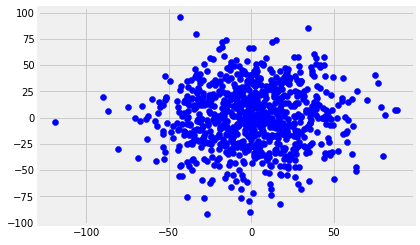

In [20]:
coords = Table.read_table("coords.csv")
# plot scatter of coords
# add a marker for the landing pad at x=0, y=0. Look at the codes from Chapter 11 or other chapters to see examples of how you can mark (0,0)
x=coords['x']
y=coords['y']
plt.scatter(x,y,color='blue')
plt.show()

In [21]:
coords

x,y
17.8207,-8.11736
4.465,2.91691
11.5573,30.368
-15.2723,-6.95247
4.18479,-36.8061
35.2748,-32.7902
-9.62583,-42.9628
-59.8439,17.283
3.65805,8.80531
-28.2791,50.522


One time, something strange happened and you landed very far from the landing mark, specifically at point (80.59, 30.91). You don't understand if it was a strange incident such as a malfunction of the drone. 


**b. (3 Points) Add marker to this point on your previous graph**

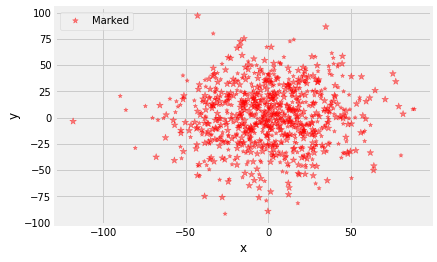

In [22]:
strange_landing = make_array(80.59, 30.91)
# recreate the previous plot and add a special marker for this strange landing
s = strange_landing
plt.scatter(x, y, s, c="r", alpha=0.5, marker=r'$\star$',
            label="Marked")

plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=2)
plt.show()

## 2. (7 points) hypothesis testing: 

**Given what you learned in CS240 you'd like to test if this was indeed a strange incident. To do this you'll use hypothesis testing.  We've written down an alternative hypothesis below.  What is a reasonable null hypothesis?**

# **Null hypothesis:** .. *In inferential statistics, the null hypothesis is a general statement or default position that there is no relationship between two measured phenomena, or no association among groups
In other words it is a basic assumption or made based on domain or problem knowledge..* ..

**Alternative hypothesis:** This landing was special; its location was a draw from some other distribution, not the distribution from which the other 1100 landing locations were drawn.

The alternative hypothesis is the hypothesis used in hypothesis testing that is contrary to the null hypothesis. It is usually taken to be that the observations are the result of a real effect (with some amount of chance variation superposed)

## 3. (6 points) What's a good test statistic for this hypothesis test? 

A good test statistic would be small if the null hypothesis is true, and large otherwise. If we want to compare landings, we want to see *how far* each landing is from some *reference point*, so we can compare all landings from the same point.


You choose the distance from each landing point to the landing mark (0, 0) as your test statistic. 

**Write a function that given x, y calculates the test statisitc at these coordinates.**

In [23]:
import pandas as pd
from scipy import stats
df = pd.read_csv("coords.csv")
df[['x','y']].describe()
ttest,pval = stats.ttest_rel(df['x'], df['y'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.8406023780348534
accept null hypothesis


In [24]:

from scipy.stats import ttest_ind
# seed the random number generator
# compare samples
stat, p = ttest_ind(1, 2)
print('t=%.3f, p=%.3f' % (stat, p))

t=nan, p=nan


C:\Users\Nouman Ahmad\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\Nouman Ahmad\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Nouman Ahmad\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Nouman Ahmad\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Nouman Ahmad\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [25]:
# Student's t-test for independent samples
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# # compare samples
# stat, p = ttest_ind(data1, data2)
# print('t=%.3f, p=%.3f' % (stat, p))

In [26]:
def landing_test_statistic(x_coordinate, y_coordinate):
    distance=make_array(x_coordinate, y_coordinate)
    distance=abs(((distance.item(0)**2)+(distance.item(1)**2))**(1/2))
    return distance

In [27]:
d1=landing_test_statistic(data1,data2)
d1

74.7101938778035

## 4. (20 points) We are going to compute the p-value using your test statistic.  

**a. (4 Points) First let's calculate the test statistic for our strange landing point (the landing point from 1.b) using the function you created in the previous question.**

In [28]:
# compare samples
stat, p = ttest_ind(data1, data2)
print('t=%.3f' % (stat))

t=-2.262


**b. (6 Points) Now we are going to find the test stat for all the landing points in our dataset. Use the function you created to calculate the test stat for all x,y values.**

In [29]:
all_points_test_stats = make_array()
# calculate the test stats for all landing points and store them to the array all_points_test_stats
import pandas as pd
from scipy import stats
df = pd.read_csv("coords.csv")
df[['x','y']].describe()
all_points_test_stats,all_point_pval = stats.ttest_rel(df['x'], df['y'])
all_points_test_stats

0.2011865254865627

**c. (6 Points) Now, to calculate the p-value for our strange landing point, we are going to count the times where our landing coordinates' test stat were larger than or equal to our strange test stat.**

**Dividing this number with the total number of landings would give us the p-value.**

In [30]:
# you will be using all_points_test_stats and strange_test_stat to calculate the p-value
print('p_value_sample=%.3f, all_point_pval=%.3f' % (p,all_point_pval))

p_value_sample=0.025, all_point_pval=0.841


**d. (4 Points) Was your landing strange after all? Briefly discuss by comparing with the commonly used p-value significance levels**

*Write your answer here, replacing this text.*

# (20 Points) Correlations

In this exercise you will be exploring the relation between peoples' weights and heights. 

In [31]:
health = Table.read_table("weight-height.csv")
health

Height,Weight
73.847,241.894
68.7819,162.31
74.1101,212.741
71.731,220.042
69.8818,206.35
67.253,152.212
68.7851,183.928
68.3485,167.971
67.0189,175.929
63.4565,156.4


**a. (6 Points) Make a scatter plot of the data.  Put weight on the vertical axis**

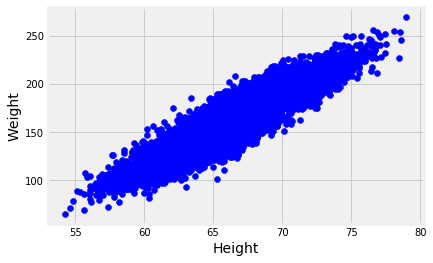

In [32]:
x=health['Height']
y=health['Weight']
plt.scatter(x,y,color='blue')
plt.xlabel('Height',fontsize=14)
plt.ylabel('Weight',fontsize=14)
plt.show()

**b. (4 Points) Look at the scatter plot. Are height and weight roughly linearly related? Indicate which of the below correlations strengths are most probably and  briefly explain your answer**
- 1
- 0
- -1

In [33]:
r = np.corrcoef(x, y)

In [34]:
r

array([[1.       , 0.9247563],
       [0.9247563, 1.       ]])

In [40]:
import scipy.stats
scipy.stats.pearsonr(x, y)    # Pearson's r

(0.9247562987378062, 0.0)

In [41]:
scipy.stats.spearmanr(x, y)   # Spearman's rho

SpearmanrResult(correlation=0.9257076644210767, pvalue=0.0)

In [42]:
scipy.stats.kendalltau(x, y)  # Kendall's tau

KendalltauResult(correlation=0.7590901890189019, pvalue=0.0)

# You use the p-value in statistical methods when you’re testing a hypothesis. The p-value is an important measure that requires in-depth knowledge of probability and statistics to interpret. To learn more about them, you can read about the basics or check out a data scientist’s explanation of p-values.

You can extract the p-values and the correlation coefficients with their indices, as the items of tuples:

In [43]:
scipy.stats.pearsonr(x, y)[0]    # Pearson's r

0.9247562987378062

In [44]:
scipy.stats.spearmanr(x, y)[0]   # Spearman's rho

0.9257076644210767

In [45]:
scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

0.7590901890189019

In [54]:
x = pd.Series(x)

In [55]:
y = pd.Series(y)

In [56]:
x.corr(y)

0.9247562987378072

In [57]:
y.corr(x)

0.9247562987378073

In [58]:
x.corr(y, method='spearman')  # Spearman's rho

0.9257076644210767

In [59]:
x.corr(y, method='kendall')   # Kendall's tau

0.7590901890189019

# Here are some important facts about the Pearson correlation coefficient:

The Pearson correlation coefficient can take on any real value in the range −1 ≤ r ≤ 1.

The maximum value r = 1 corresponds to the case when there’s a perfect positive linear relationship between x and y. In other words, larger x values correspond to larger y values and vice versa.

The value r > 0 indicates positive correlation between x and y.

The value r = 0 corresponds to the case when x and y are independent.

The value r < 0 indicates negative correlation between x and y.

The minimal value r = −1 corresponds to the case when there’s a perfect negative linear relationship between x and y. In other words, larger x values correspond to smaller y values and vice versa.

The above facts can be summed up in the following table:

Pearson’s r Value	Correlation Between x and y
equal to 1	perfect positive linear relationship
greater than 0	positive correlation
equal to 0	independent
less than 0	negative correlation
equal to -1	perfect negative linear relationship

*Write your answer here, replacing this text.*

**c. (5 Points) We'd next like to see the data in standard units.  Recall that, if `nums` is an array of numbers, then..**

    (nums - np.mean(nums)) / np.std(nums)

**...is an array of those numbers in standard units.**

In [94]:
weight = health['Weight']
height = health['Height']

In [108]:
weight_std_unit= (weight-np.mean(weight)/np.std(weight))
weight_std_unit

array([236.86533902, 157.28224832, 207.71263142, ..., 123.44709462,
       158.82423712, 108.62087852])

In [109]:
height_std_unit = (height-np.mean(height)/np.std(height))
height_std_unit

array([56.59675236, 51.53163939, 56.85984073, ..., 46.61772755,
       51.78397847, 44.69398122])

In [110]:
weight_mean =np.mean(weight)
weight_std = np.std(weight)
height_mean =np.mean(height)
height_std = np.std(height)

standard_health = Table().with_columns(
    "weight (standard units)" , str(weight_std_unit),
    "height (standard units)" ,str(height_std_unit))

In [111]:
standard_health

weight (standard units),height (standard units)
[236.86533902 157.28224832 207.71263142 ... 123.44709462 ...,[56.59675236 51.53163939 56.85984073 ... 46.61772755 51. ...


**d. (5 Points) Calculate the correlation score between the two variables**

Hint: Calculate this by using the data in the standard units.

In [113]:
from scipy.stats import pearsonr
corr, _ = pearsonr(weight_std_unit, height_std_unit)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.925
